In [2]:
from corespray import corespraydf
from galpy.potential import MWPotential2014
from galpy.util import conversion
from galpy.orbit import Orbit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

import seaborn as sns

from IPython.display import HTML
%matplotlib inline

/usr/local/lib/python3.9/site-packages/galpy-1.8.0.dev0-py3.9-macosx-10.15-x86_64.egg/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/usr/local/lib/python3.9/site-packages/galpy-1.8.0.dev0-py3.9-macosx-10.15-x86_64.egg/galpy/util/bovy_plot.py:5: FutureWarning: galpy.util.bovy_plot is being deprecated in favor of galpy.util.plot; functions inside of this module have also changed name, but all functions still exist; please switch to the new import and new function names, because the old import and function names will be removed in v1.9
  warnings.warn('galpy.util

In [3]:
ro,vo=8.,220.
to=conversion.time_in_Gyr(ro=ro,vo=vo)*1000.


In [4]:
#Globular Cluster NGC 6397
gcname='NGC6397'
mu0=0.
sig0=5.3
vesc0=21.1
logrho0=6.41
rho0=10.0**6.41

mgc=1.0e5
rgc=3.
W0=5.

mmin=0.1
mmax=1.4
alpha=-1

In [5]:
cspray=corespraydf(gcname,MWPotential2014,mu0,sig0,vesc0,rho0,mgc,rgc,W0,mmin,mmax,alpha)

In [6]:
os=cspray.sample(1000,nstar=10)

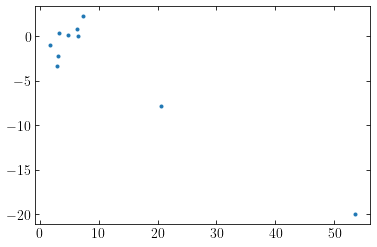

In [7]:
plt.plot(os.R(),os.z(),'.')
plt.show()

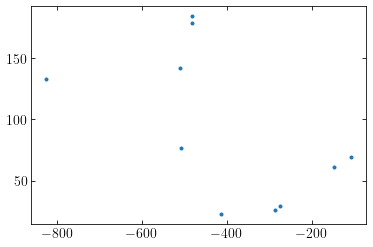

In [10]:
plt.plot(cspray.tesc,cspray.vesc,'.')

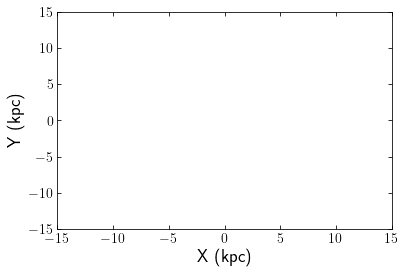

In [11]:
cspray.animate(frames=100,interval=50,xlim=(-15,15),ylim=(-15,15))

In [12]:
HTML(cspray.anim.to_jshtml())


In [12]:
cspray.snapout()

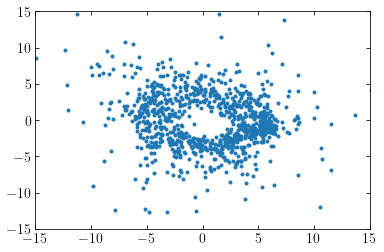

In [16]:
plt.plot(os.x(),os.y(),'.')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()
plt.close()

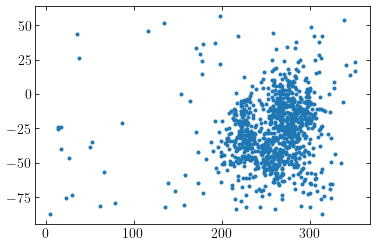

In [17]:
plt.plot(os.ra(),os.dec(),'.')
plt.show()
plt.close()

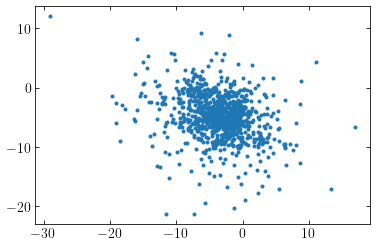

In [18]:
plt.plot(os.pmra(),os.pmdec(),'.')
plt.show()
plt.close()

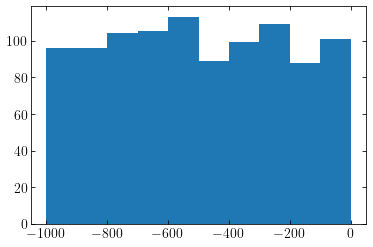

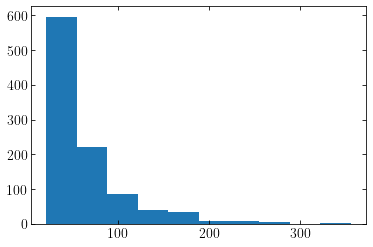

In [19]:
plt.hist(cspray.tesc)
plt.show()
plt.close()

plt.hist(cspray.vesc)
plt.show()
plt.close()

In [20]:
ts=np.linspace(0,1,1000)
os.integrate(ts,MWPotential2014)
jr,jp,jz=os.jr(),os.jp(),os.jz()

In [21]:
vindx=cspray.vesc<500

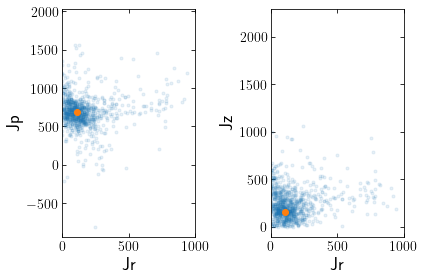

In [22]:
plt.subplot(1,2,1)

plt.plot(jr[vindx],jp[vindx],'.',alpha=0.1)
plt.plot(cspray.o.jr(),cspray.o.jp(),'o')

plt.xlabel('Jr')
plt.ylabel('Jp')
plt.xlim(0,1000)

plt.subplot(1,2,2)

plt.plot(jr[vindx],jz[vindx],'.',alpha=0.1)
plt.plot(cspray.o.jr(),cspray.o.jz(),'o')

plt.xlabel('Jr')
plt.ylabel('Jz')

plt.xlim(0,1000)

plt.tight_layout()

plt.show()
plt.close()